<a href="https://colab.research.google.com/github/naruto1206/Homework-CNN-AI/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import random
import os

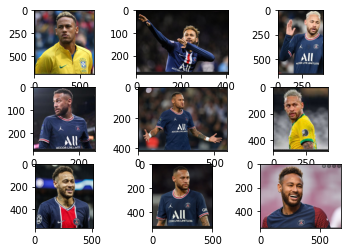

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/Data-face-recognition/train/neymar/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'ney' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-face-recognition/train/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-face-recognition/validation/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 64 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [ ]:
history=model.fit(train_dataset,batch_size=250,epochs=50,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/50
7/7 [==============================] - 13s 2s/step - loss: 0.0969 - accuracy: 0.9688 - val_loss: 2.4942 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 11s 1s/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 2.2294 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 10s 1s/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 4.3158 - val_accuracy: 0.2500
Epoch 4/50
7/7 [==============================] - 10s 1s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 4.1609 - val_accuracy: 0.2500
Epoch 5/50
7/7 [==============================] - 10s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.3982 - val_accuracy: 0.2500
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 0.0755 - accuracy: 0.9844 - val_loss: 3.6297 - val_accuracy: 0.2500
Epoch 7/50
7/7 [==============================] - 11s 2s/step - loss: 0.0654 - accuracy: 0.9844 - val_loss: 3.6955 - val_accuracy: 0.5000
Epoch 8/50
7/7 [==================

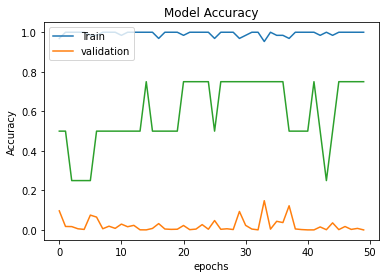

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()


In [ ]:
pip install mtcnn 

     |████████████████████████████████| 2.3 MB 4.1 MB/s 


Day la Messi
{'box': [344, 100, 109, 154], 'confidence': 0.9999884366989136, 'keypoints': {'left_eye': (355, 157), 'right_eye': (391, 156), 'nose': (356, 188), 'mouth_left': (365, 219), 'mouth_right': (398, 217)}}


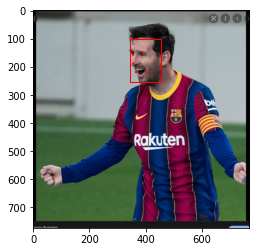

In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-face-recognition/validation/messi/messi4.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la Doan')
elif kq ==1:
  print('Day la Messi')
elif kq ==2:
  print('Day la Neymar')
elif kq ==3:
  print('Day la Ronaldo')
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()

{'box': [1137, 538, 523, 596], 'confidence': 0.9999990463256836, 'keypoints': {'left_eye': (1279, 746), 'right_eye': (1523, 740), 'nose': (1393, 845), 'mouth_left': (1307, 990), 'mouth_right': (1499, 986)}}


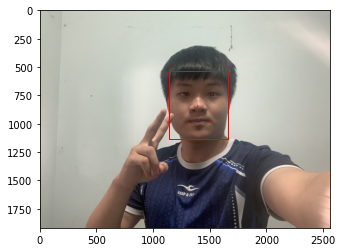

Day la Doan


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-face-recognition/validation/doan/doan3.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()
if kq==0:
  print('Day la Doan')
elif kq ==1:
  print('Day la Messi')
elif kq ==2:
  print('Day la Neymar')
elif kq ==3:
  print('Day la Ronaldo')


{'box': [247, 68, 105, 144], 'confidence': 0.9999105930328369, 'keypoints': {'left_eye': (294, 114), 'right_eye': (340, 128), 'nose': (324, 135), 'mouth_left': (291, 164), 'mouth_right': (328, 172)}}


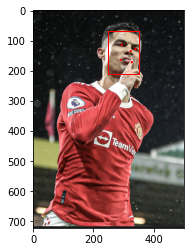

Day la Ronaldo


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-face-recognition/validation/ro/ro2.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()
if kq==0:
  print('Day la Doan')
elif kq ==1:
  print('Day la Messi')
elif kq ==2:
  print('Day la Neymar')
elif kq ==3:
  print('Day la Ronaldo')


{'box': [247, 68, 105, 144], 'confidence': 0.9999105930328369, 'keypoints': {'left_eye': (294, 114), 'right_eye': (340, 128), 'nose': (324, 135), 'mouth_left': (291, 164), 'mouth_right': (328, 172)}}


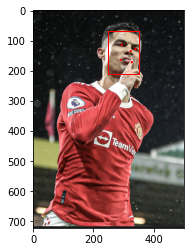

Day la Ronaldo


In [ ]:
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
# plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
import matplotlib.pyplot as plt
from mtcnn import MTCNN
pixel = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixel)
for face in faces:
  print(face)
data = plt.imread(filename)
plt.imshow(data)
ax = plt.gca()
for face in faces:
  x,y,width,height = face['box']
  rect=plt.Rectangle((x,y),width,height,
                     fill=False, color='red')
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius=2,color='red')
    ax.add_patch(dot)
plt.show()
if kq==0:
  print('Day la Doan')
elif kq ==1:
  print('Day la Messi')
elif kq ==2:
  print('Day la Neymar')
elif kq ==3:
  print('Day la Ronaldo')

In [ ]:
model.save('face_rec_50epochs.h5')